## Context

* There is a huge demand for used cars in the Indian Market today. As sales of new cars have slowed down in the recent past, the pre-owned car market has continued to grow over the past years and is larger than the new car market now. Cars4U is a budding tech start-up that aims to find footholes in this market.

* In 2018-19, while new car sales were recorded at 3.6 million units, around 4 million second-hand cars were bought and sold. There is a slowdown in new car sales and that could mean that the demand is shifting towards the pre-owned market. In fact, some car sellers replace their old cars with pre-owned cars instead of buying new ones. Unlike new cars, where price and supply are fairly deterministic and managed by OEMs (Original Equipment Manufacturer / except for dealership level discounts which come into play only in the last stage of the customer journey), used cars are very different beasts with huge uncertainty in both pricing and supply. Keeping this in mind, the pricing scheme of these used cars becomes important in order to grow in the market.

* I am going to come up with a pricing model that can effectively predict the price of used cars and can help the business in devising profitable strategies using differential pricing. For example, if the business knows the market price, it will never sell anything below it.

## Objective

* To explore and visualize the dataset, build a linear regression model to predict the prices of used cars, and generate a set of insights and recommendations that will help the business.

## Data Description

* The data contains the different attributes of used cars sold in different locations. The detailed data dictionary is given below.

## Data Dictionary

* S.No.: Serial number
* Name: Name of the car which includes brand name and model name
* Location: Location in which the car is being sold or is available for purchase (cities)
* Year: Manufacturing year of the car
* Kilometers_driven: The total kilometers (a unit used to measure length or distance) driven in the car by the previous owner(s)
* Fuel_Type: The type of fuel used by the car (Petrol, Diesel, Electric, CNG, LPG)
* Transmission: The type of transmission used by the car (Automatic/Manual)
* Owner: Type of ownership
* Mileage: The standard mileage offered by the car company in kmpl or km/kg
* Engine: The displacement volume of the engine in CC
* Power: The maximum power of the engine in bhp
* Seats: The number of seats in the car
* New_Price: The price of a new car of the same model in INR Lakhs (1 Lakh INR = 100,000 INR)
* Price: The price of the used car in INR Lakhs

## Importing Libraries

In [5]:
# libraries for manioulating and reading data
import pandas as pd
import numpy as np

# libraries for Visuals 
import matplotlib.pyplot as plt
import seaborn as sns

# library for giving us full read option for columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# libraries for building and testing our model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")

## Data Validation

In [6]:
# loading the data
data = pd.read_csv('used_cars_data.csv')
data.head()

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74


In [7]:
# shape of the data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")

There are 7253 rows and 14 columns.


In [8]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7253 entries, 0 to 7252
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   S.No.              7253 non-null   int64  
 1   Name               7253 non-null   object 
 2   Location           7253 non-null   object 
 3   Year               7253 non-null   int64  
 4   Kilometers_Driven  7253 non-null   int64  
 5   Fuel_Type          7253 non-null   object 
 6   Transmission       7253 non-null   object 
 7   Owner_Type         7253 non-null   object 
 8   Mileage            7251 non-null   object 
 9   Engine             7207 non-null   object 
 10  Power              7078 non-null   object 
 11  Seats              7200 non-null   float64
 12  New_Price          7253 non-null   float64
 13  Price              6019 non-null   float64
dtypes: float64(3), int64(3), object(8)
memory usage: 793.4+ KB


* The Data has 14 columns
* 8 columns being of the object data type, 3 integer type and 3 which are of the type float
* From the data info we can see that some columns have null values
* Mileage,Engine,Power are object data tpes however they are numerical and need to be converted

In [9]:
#Describing the data
data.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
S.No.,7253.0,NaN,NaN,NaN,3626.0,2093.905084,0.0,1813.0,3626.0,5439.0,7252.0
Name,7253,2041,Mahindra XUV500 W8 2WD,55,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Location,7253,11,Mumbai,949,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,7253.0,NaN,NaN,NaN,2013.365366,3.254421,1996.0,2011.0,2014.0,2016.0,2019.0
Kilometers_Driven,7253.0,NaN,NaN,NaN,58699.063146,84427.720583,171.0,34000.0,53416.0,73000.0,6500000.0
Fuel_Type,7253,5,Diesel,3852,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Transmission,7253,2,Manual,5204,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Owner_Type,7253,4,First,5952,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Mileage,7251,450,17.0 kmpl,207,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Engine,7207,150,1197 CC,732,NaN,NaN,NaN,NaN,NaN,NaN,NaN


* There are 11 different unique locations
* We have 5 different unique Fuel type, 2 different unique Transmissions and 4 unique owner type

In [10]:
# checking for null columns
data.isnull().sum()

S.No.                   0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1234
dtype: int64

* There are 4 columns with null values
* Price has the highest number of null values

In [11]:
# let's view a sample of the data
data.sample(n=10, random_state=1)

,S.No.,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
2397,2397,Ford EcoSport 1.5 Petrol Trend,Kolkata,2016,21460,Petrol,Manual,First,17.0 kmpl,1497 CC,121.36 bhp,5.0,9.47,6.00
3777,3777,Maruti Wagon R VXI 1.2,Kochi,2015,49818,Petrol,Manual,First,21.5 kmpl,1197 CC,81.80 bhp,5.0,5.44,4.11
4425,4425,Ford Endeavour 4x2 XLT,Hyderabad,2007,130000,Diesel,Manual,First,13.1 kmpl,2499 CC,141 bhp,7.0,35.29,6.00
3661,3661,Mercedes-Benz E-Class E250 CDI Avantgrade,Coimbatore,2016,39753,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,35.28
4514,4514,Hyundai Xcent 1.2 Kappa AT SX Option,Kochi,2016,45560,Petrol,Automatic,First,16.9 kmpl,1197 CC,82 bhp,5.0,8.23,6.34
599,599,Toyota Innova Crysta 2.8 ZX AT,Coimbatore,2019,40674,Diesel,Automatic,First,11.36 kmpl,2755 CC,171.5 bhp,7.0,28.05,24.82
186,186,Mercedes-Benz E-Class E250 CDI Avantgrade,Bangalore,2014,37382,Diesel,Automatic,First,13.0 kmpl,2143 CC,201.1 bhp,5.0,86.97,32.00
305,305,Audi A6 2011-2015 2.0 TDI Premium Plus,Kochi,2014,61726,Diesel,Automatic,First,17.68 kmpl,1968 CC,174.33 bhp,5.0,67.10,20.77
4582,4582,Hyundai i20 1.2 Magna,Kolkata,2011,36000,Petrol,Manual,First,18.5 kmpl,1197 CC,80 bhp,5.0,10.25,2.50
5434,5434,Honda WR-V Edge Edition i-VTEC S,Kochi,2019,13913,Petrol,Manual,First,17.5 kmpl,1199 CC,88.7 bhp,5.0,9.36,8.20


* S.No. contains the index of the data entry and will not provide any useful information for our analysis hence we will drop that column
* Mileage,Engine,and Power will need some preprocessing. Numerical data will need to be collected from them. 

In [12]:
# let's create a copy of the data to avoid any changes to original data
df = data.copy()

In [13]:
# drop the S.No. column 
df.drop("S.No.", axis=1, inplace=True)

In [14]:
# checking for duplicates
df.duplicated().sum()

1

* lets take a closer look at the duplicated column

In [15]:
df[df.duplicated(keep=False) == True]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
6498,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,13.58,NaN
6582,Honda City 1.5 E MT,Mumbai,2010,52000,Petrol,Manual,First,17.0 kmpl,1497 CC,118 bhp,5.0,13.58,NaN


* All columns are exactly identical which is reasonable, however itis very unlikely for two car to have the same kilometers driven hence we will drop the second row

In [16]:
df.drop(6582 , inplace = True)

## Data Preprocessing

* from the data, it was observed that the Mileage, Engine and Power columns have been assigned the object datatype even though they are numeric. this is because they have strings attached to them
* we would have to do away with the string values and convert the values to floats for the modelling to be effective

### 1. Mileage

In [18]:
df[['Mileage']].head(10)

,Mileage
0,26.6 km/kg
1,19.67 kmpl
2,18.2 kmpl
3,20.77 kmpl
4,15.2 kmpl
5,21.1 km/kg
6,23.08 kmpl
7,11.36 kmpl
8,20.54 kmpl
9,22.3 kmpl


* We have car mileage in two units as per the data dictionary - kmpl and km/kg

In [19]:
df_mileage = df["Mileage"].str.split(" ", expand=True)
df_mileage.head()

,0,1
0,26.6,km/kg
1,19.67,kmpl
2,18.2,kmpl
3,20.77,kmpl
4,15.2,kmpl


In [23]:
# let's verify that there are two units
df_mileage[1].value_counts()

kmpl     7176
km/kg      74
Name: 1, dtype: int64

* There 74 rows with km/kg and 7176 as kmpl.
* kmpl and km/kg are units associated with different types of fuel, but both the units refer to the distance covered (in km) per unit of fuel. So, there is no need to convert between them. The units can be stripped off and the numerical values can be used as they are.

In [24]:
# we will create two new columns for mileage values and units
df["mileage_num"] = df_mileage[0].astype(float)
df["mileage_unit"] = df_mileage[1]

# Checking the new dataframe
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_num,mileage_unit
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,26.60,km/kg
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,19.67,kmpl
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,18.20,kmpl
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,20.77,kmpl
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,15.20,kmpl


### 2. Engine

* As per the data dictionary, the Engine column indicates the displacement volume of the engine in CC.
* Let's extract the numerical part of the column values

In [25]:
# viewing the column values
df[["Engine"]].head(10)

,Engine
0,998 CC
1,1582 CC
2,1199 CC
3,1248 CC
4,1968 CC
5,814 CC
6,1461 CC
7,2755 CC
8,1598 CC
9,1248 CC


In [26]:
df_engine = df["Engine"].str.split(" ", expand=True)
df_engine.head()

,0,1
0,998,CC
1,1582,CC
2,1199,CC
3,1248,CC
4,1968,CC


In [27]:
#creating a new dataframe for the engine number
df['Engine_num'] = df_engine[0].astype(float)

# lets check the data
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_num,mileage_unit,Engine_num
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,26.60,km/kg,998.0
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,19.67,kmpl,1582.0
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,18.20,kmpl,1199.0
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,20.77,kmpl,1248.0
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,15.20,kmpl,1968.0


### 3.Power

* As per the data dictionary, the Power column indicates the maximum power of the engine in bhp.
* Let's extract the numerical part of the column values.

In [28]:
# viewing the column values
df[["Power"]].head(10)

,Power
0,58.16 bhp
1,126.2 bhp
2,88.7 bhp
3,88.76 bhp
4,140.8 bhp
5,55.2 bhp
6,63.1 bhp
7,171.5 bhp
8,103.6 bhp
9,74 bhp


In [29]:
# Converting Power Column into a numeric one
def Power_con(val):
    """
    This function takes in a string representing the Power
    and converts it to a number. For example, '8bhp' becomes 8.
    If the input is already numeric, which probably means it's NaN,
    this function just returns np.nan.
    """
    if isinstance (val,str):
        if val.endswith ('bhp'):
            return float(val.replace('bhp',''))
    else:    
        return np.nan

In [30]:
# Apply the function to our dataframe
df["Power_num"] = df["Power"].apply(Power_con)
df[["Power_num", "Power"]].head()

,Power_num,Power
0,58.16,58.16 bhp
1,126.20,126.2 bhp
2,88.70,88.7 bhp
3,88.76,88.76 bhp
4,140.80,140.8 bhp


In [31]:
# Checking the new dataframe
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,mileage_num,mileage_unit,Engine_num,Power_num
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,5.51,1.75,26.60,km/kg,998.0,58.16
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,16.06,12.50,19.67,kmpl,1582.0,126.20
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61,4.50,18.20,kmpl,1199.0,88.70
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,11.27,6.00,20.77,kmpl,1248.0,88.76
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,53.14,17.74,15.20,kmpl,1968.0,140.80


In [32]:
# checking for datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7252 entries, 0 to 7252
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               7252 non-null   object 
 1   Location           7252 non-null   object 
 2   Year               7252 non-null   int64  
 3   Kilometers_Driven  7252 non-null   int64  
 4   Fuel_Type          7252 non-null   object 
 5   Transmission       7252 non-null   object 
 6   Owner_Type         7252 non-null   object 
 7   Mileage            7250 non-null   object 
 8   Engine             7206 non-null   object 
 9   Power              7077 non-null   object 
 10  Seats              7199 non-null   float64
 11  New_Price          7252 non-null   float64
 12  Price              6019 non-null   float64
 13  mileage_num        7250 non-null   float64
 14  mileage_unit       7250 non-null   object 
 15  Engine_num         7206 non-null   float64
 16  Power_num          7077 

### Missing value treatment

In [33]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 46
Power                 175
Seats                  53
New_Price               0
Price                1233
mileage_num             2
mileage_unit            2
Engine_num             46
Power_num             175
dtype: int64

*lets drop the redundant columns

In [35]:
df.drop(columns=['Mileage','Power','Engine'],inplace = True)

In [36]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                  53
New_Price               0
Price                1233
mileage_num             2
mileage_unit            2
Engine_num             46
Power_num             175
dtype: int64

In [37]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,7252.0,2013.365830,3.254405,1996.00,2011.00,2014.00,2016.0000,2019.00
Kilometers_Driven,7252.0,58699.986900,84433.505524,171.00,34000.00,53429.00,73000.0000,6500000.00
Seats,7199.0,5.279761,0.811709,0.00,5.00,5.00,5.0000,10.00
New_Price,7252.0,21.308387,24.257816,3.91,7.88,11.30,21.6975,375.00
Price,6019.0,9.479468,11.187917,0.44,3.50,5.64,9.9500,160.00
mileage_num,7250.0,18.141738,4.562492,0.00,15.17,18.16,21.1000,33.54
Engine_num,7206.0,1616.590064,595.324779,72.00,1198.00,1493.00,1968.0000,5998.00
Power_num,7077.0,112.764474,53.497297,34.20,75.00,94.00,138.1000,616.00


#### Observations
* There is a huge range between the min and max for the Kilometers_Driven column
* A car having zero seats warrants a check
* The price column also requires a check as used cars are sold really cheap and also as high as 160INR
* The mileage column has to be checked as well as a used car having a minimum mileage of 0 is alarming


### Missing value treatment (contd.)

In [38]:
df[df["Seats"].isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,mileage_unit,Engine_num,Power_num
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,NaN,13.580,2.95,0.00,kmpl,NaN,NaN
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,NaN,7.880,2.11,16.10,kmpl,NaN,NaN
229,Ford Figo Diesel,Bangalore,2015,70436,Diesel,Manual,First,NaN,7.650,3.60,0.00,kmpl,1498.0,99.0
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,NaN,7.880,1.75,16.10,kmpl,NaN,NaN
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,NaN,120.000,26.50,0.00,kmpl,NaN,NaN
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,NaN,13.580,3.20,12.80,kmpl,NaN,NaN
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,NaN,7.880,5.80,16.10,kmpl,NaN,NaN
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,NaN,13.580,1.50,0.00,kmpl,NaN,NaN
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,NaN,120.000,40.88,0.00,kmpl,NaN,NaN
1917,Honda City 1.5 EXI,Jaipur,2005,88000,Petrol,Manual,Second,NaN,13.580,1.70,13.00,kmpl,1493.0,100.0


* we will take the median of the seats column and use it to impute

In [39]:
median_seats = df['Seats'].median()
median_seats

5.0

In [40]:
# Replacing the values with the Median of Seats
df["Seats"].fillna(median_seats, inplace=True)

In [41]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
New_Price               0
Price                1233
mileage_num             2
mileage_unit            2
Engine_num             46
Power_num             175
dtype: int64

In [42]:
# Dealing with missing values in the mileage column
df[df.mileage_num.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,mileage_unit,Engine_num,Power_num
4446,Mahindra E Verito D4,Chennai,2016,50000,Electric,Automatic,First,5.0,13.58,13.00,NaN,NaN,72.0,41.0
4904,Toyota Prius 2009-2016 Z4,Mumbai,2011,44000,Electric,Automatic,First,5.0,24.01,12.75,NaN,NaN,1798.0,73.0


In [43]:
# there are only two rows with missing values hence we will be imputing using the median
df['mileage_num'].fillna(df['mileage_num'].median(),inplace =True)

In [44]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
New_Price               0
Price                1233
mileage_num             0
mileage_unit            2
Engine_num             46
Power_num             175
dtype: int64

In [45]:
# Dealing with missing values in the engine_num column
df[df.Engine_num.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,mileage_unit,Engine_num,Power_num
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,5.0,13.580,2.95,0.00,kmpl,NaN,NaN
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,5.0,7.880,2.11,16.10,kmpl,NaN,NaN
733,Maruti Swift 1.3 VXi,Chennai,2006,97800,Petrol,Manual,Third,5.0,7.880,1.75,16.10,kmpl,NaN,NaN
749,Land Rover Range Rover 3.0 D,Mumbai,2008,55001,Diesel,Automatic,Second,5.0,120.000,26.50,0.00,kmpl,NaN,NaN
1294,Honda City 1.3 DX,Delhi,2009,55005,Petrol,Manual,First,5.0,13.580,3.20,12.80,kmpl,NaN,NaN
1327,Maruti Swift 1.3 ZXI,Hyderabad,2015,50295,Petrol,Manual,First,5.0,7.880,5.80,16.10,kmpl,NaN,NaN
1385,Honda City 1.5 GXI,Pune,2004,115000,Petrol,Manual,Second,5.0,13.580,1.50,0.00,kmpl,NaN,NaN
1460,Land Rover Range Rover Sport 2005 2012 Sport,Coimbatore,2008,69078,Petrol,Manual,First,5.0,120.000,40.88,0.00,kmpl,NaN,NaN
2074,Maruti Swift 1.3 LXI,Pune,2011,24255,Petrol,Manual,First,5.0,7.880,3.15,16.10,kmpl,NaN,NaN
2096,Hyundai Santro LP zipPlus,Coimbatore,2004,52146,Petrol,Manual,First,5.0,4.550,1.93,0.00,kmpl,NaN,NaN


In [47]:
# Statistical View of Engine
df.Engine_num.describe()

count    7206.000000
mean     1616.590064
std       595.324779
min        72.000000
25%      1198.000000
50%      1493.000000
75%      1968.000000
max      5998.000000
Name: Engine_num, dtype: float64

* we will replace the missing values with the midian of the column

In [49]:
df['Engine_num'].fillna(df['Engine_num'].median(),inplace = True)

In [50]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
New_Price               0
Price                1233
mileage_num             0
mileage_unit            2
Engine_num              0
Power_num             175
dtype: int64

In [51]:
# Dealing with the missing values in the power column
df[df.Power_num.isnull()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,mileage_unit,Engine_num,Power_num
76,Ford Fiesta 1.4 SXi TDCi,Jaipur,2008,111111,Diesel,Manual,First,5.0,11.685,2.00,17.80,kmpl,1399.0,NaN
79,Hyundai Santro Xing XL,Hyderabad,2005,87591,Petrol,Manual,First,5.0,4.550,1.30,0.00,kmpl,1086.0,NaN
89,Hyundai Santro Xing XO,Hyderabad,2007,73745,Petrol,Manual,First,5.0,4.550,2.10,17.00,kmpl,1086.0,NaN
120,Hyundai Santro Xing XL eRLX Euro III,Mumbai,2005,102000,Petrol,Manual,Second,5.0,4.550,0.85,17.00,kmpl,1086.0,NaN
143,Hyundai Santro Xing XO eRLX Euro II,Kochi,2008,80759,Petrol,Manual,Third,5.0,4.550,1.67,17.00,kmpl,1086.0,NaN
194,Honda City 1.5 GXI,Ahmedabad,2007,60006,Petrol,Manual,First,5.0,13.580,2.95,0.00,kmpl,1493.0,NaN
208,Maruti Swift 1.3 VXi,Kolkata,2010,42001,Petrol,Manual,First,5.0,7.880,2.11,16.10,kmpl,1493.0,NaN
227,Maruti Swift VDI BSIV,Delhi,2013,47000,Diesel,Manual,First,5.0,7.880,4.10,17.80,kmpl,1248.0,NaN
245,Hyundai Santro Xing XO eRLX Euro II,Mumbai,2007,72000,Petrol,Manual,Third,5.0,4.550,0.95,17.00,kmpl,1086.0,NaN
262,Hyundai Santro Xing XL,Hyderabad,2006,99000,Petrol,Manual,First,5.0,4.550,1.75,0.00,kmpl,1086.0,NaN


In [54]:
df['Power_num'].describe()

count    7077.000000
mean      112.764474
std        53.497297
min        34.200000
25%        75.000000
50%        94.000000
75%       138.100000
max       616.000000
Name: Power_num, dtype: float64

* we will replace the missing values with the median of the column

In [55]:
df['Power_num'].fillna(df['Power_num'].median(), inplace = True)

In [56]:
df.isnull().sum()

Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Seats                   0
New_Price               0
Price                1233
mileage_num             0
mileage_unit            2
Engine_num              0
Power_num               0
dtype: int64

In [57]:
# dropping missing values in Price column
df = df[df["Price"].notna()]

In [70]:
df['mileage_unit'].dropna()

0       km/kg
1        kmpl
2        kmpl
3        kmpl
4        kmpl
        ...  
6014     kmpl
6015     kmpl
6016     kmpl
6017     kmpl
6018     kmpl
Name: mileage_unit, Length: 6017, dtype: object

In [58]:
df.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Seats                0
New_Price            0
Price                0
mileage_num          0
mileage_unit         2
Engine_num           0
Power_num            0
dtype: int64

## Feature Engineering

* Looking at the Name column it can be seen that it contains different information such as the brand and model of the car
* splitting the Name column into the brand and model will give more information and also help with our modelling

In [61]:
# lets check the unique values in the Name column
df['Name'].nunique()

1876

* This large number of unique names will not be of great help in our modelling hence we are going to break it down to retrieve important data from the column

### Extracting the Brand of the cars

In [62]:
# Extracting the brand name
df["Brand"] = df["Name"].apply(lambda x: x.split(" ")[0].lower())
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,mileage_unit,Engine_num,Power_num,Brand
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,5.51,1.75,26.60,km/kg,998.0,58.16,maruti
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,16.06,12.50,19.67,kmpl,1582.0,126.20,hyundai
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61,4.50,18.20,kmpl,1199.0,88.70,honda
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,11.27,6.00,20.77,kmpl,1248.0,88.76,maruti
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,kmpl,1968.0,140.80,audi


In [63]:
# checking for the unique values in the new brand column
df['Brand'].unique()

array(['maruti', 'hyundai', 'honda', 'audi', 'nissan', 'toyota',
       'volkswagen', 'tata', 'land', 'mitsubishi', 'renault',
       'mercedes-benz', 'bmw', 'mahindra', 'ford', 'porsche', 'datsun',
       'jaguar', 'volvo', 'chevrolet', 'skoda', 'mini', 'fiat', 'jeep',
       'smart', 'ambassador', 'isuzu', 'force', 'bentley', 'lamborghini'],
      dtype=object)

In [64]:
df['Brand'].value_counts()

maruti           1211
hyundai          1107
honda             608
toyota            411
mercedes-benz     318
volkswagen        315
ford              300
mahindra          272
bmw               267
audi              236
tata              186
skoda             173
renault           145
chevrolet         121
nissan             91
land               60
jaguar             40
fiat               28
mitsubishi         27
mini               26
volvo              21
porsche            18
jeep               15
datsun             13
isuzu               3
force               3
smart               1
ambassador          1
bentley             1
lamborghini         1
Name: Brand, dtype: int64

### Extracting the model of the cars

In [65]:
# Extracting the model names
df["Model"] = df["Name"].apply(lambda x: x.split(" ")[1].lower())
df.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,mileage_unit,Engine_num,Power_num,Brand,Model
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,5.0,5.51,1.75,26.60,km/kg,998.0,58.16,maruti,wagon
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,5.0,16.06,12.50,19.67,kmpl,1582.0,126.20,hyundai,creta
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61,4.50,18.20,kmpl,1199.0,88.70,honda,jazz
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,7.0,11.27,6.00,20.77,kmpl,1248.0,88.76,maruti,ertiga
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,kmpl,1968.0,140.80,audi,a4


In [66]:
# checking the unique values for the car models
df['Model'].unique()

array(['wagon', 'creta', 'jazz', 'ertiga', 'a4', 'eon', 'micra', 'innova',
       'vento', 'indica', 'ciaz', 'city', 'swift', 'rover', 'pajero',
       'amaze', 'duster', 'new', '3', 's', 'a6', 'i20', 'alto', 'wrv',
       'corolla', 'ssangyong', 'vitara', 'kuv', 'm-class', 'polo', 'nano',
       'elantra', 'xcent', 'thar', 'grand', 'kwid', 'i10', 'x-trail',
       'zen', 'figo', 'c-class', 'cayenne', 'xuv500', 'terrano', 'brio',
       'fiesta', 'santro', 'zest', 'ritz', '5', 'fortuner', 'ecosport',
       'verna', 'go', 'omni', 'etios', 'xf', 'eeco', 'civic', 'v40', 'b',
       'scorpio', 'cr-v', 'slc', '1', 'beat', 'rapid', 'rs5', 'superb',
       'x5', 'glc', 'countryman', 'optra', 'lodgy', 'e-class', 'baleno',
       'laura', 'nuvosport', 'fabia', 'indigo', 'q3', 'octavia', 'a8',
       'verito', 'cooper', 'santa', 'x1', 'accent', 'tucson', 'gle',
       'a-star', 'grande', 'x3', 'q7', 'jetta', 'gla', 'celerio', 'sumo',
       'accord', '6', 'manza', 'spark', 'clubman', 'teana', '

In [67]:
df['Model'].value_counts()

swift         353
city          270
i20           247
verna         170
innova        164
             ... 
beetle          1
petra           1
tiguan          1
countryman      1
f               1
Name: Model, Length: 211, dtype: int64

In [71]:
# checking used car prices grouped by brand
df.groupby(["Brand"])["Price"].mean().sort_values(ascending=False)

Brand
lamborghini      120.000000
bentley           59.000000
porsche           48.348333
land              39.259500
jaguar            37.632250
mini              26.896923
mercedes-benz     26.809874
audi              25.537712
bmw               25.243146
volvo             18.802857
jeep              18.718667
isuzu             14.696667
toyota            11.580024
mitsubishi        11.058889
force              9.333333
mahindra           8.045919
skoda              7.559075
ford               6.889400
renault            5.799034
honda              5.411743
hyundai            5.343433
volkswagen         5.307270
nissan             4.738352
maruti             4.517267
tata               3.562849
fiat               3.269286
datsun             3.049231
chevrolet          3.044463
smart              3.000000
ambassador         1.350000
Name: Price, dtype: float64

* As expected the more expensive car brands have high average prices for used cars and the more budget friendly cars are below

* we are going to drop the Name and mileage_unit columns as we will not beusing them in our modelling or EDA

In [72]:
# Dropping the name and mileage_unit columns
df.drop(columns=["Name", "mileage_unit"], inplace=True)

### Lets create new log transformed columns

In [73]:
df["price_log"] = np.log(df["Price"])

In [74]:
df["new_price_log"] = np.log(df["New_Price"])

In [75]:
df["kilometers_driven_log"] = np.log(df["Kilometers_Driven"])

In [76]:
df.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,Engine_num,Power_num,Brand,Model,price_log,new_price_log,kilometers_driven_log
0,Mumbai,2010,72000,CNG,Manual,First,5.0,5.51,1.75,26.60,998.0,58.16,maruti,wagon,0.559616,1.706565,11.184421
1,Pune,2015,41000,Diesel,Manual,First,5.0,16.06,12.50,19.67,1582.0,126.20,hyundai,creta,2.525729,2.776332,10.621327
2,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61,4.50,18.20,1199.0,88.70,honda,jazz,1.504077,2.152924,10.736397
3,Chennai,2012,87000,Diesel,Manual,First,7.0,11.27,6.00,20.77,1248.0,88.76,maruti,ertiga,1.791759,2.422144,11.373663
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,1968.0,140.80,audi,a4,2.875822,3.972930,10.613246


## EDA

In [77]:
df1 = df.copy()

In [78]:
df1.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'New_Price', 'Price', 'mileage_num',
       'Engine_num', 'Power_num', 'Brand', 'Model', 'price_log',
       'new_price_log', 'kilometers_driven_log'],
      dtype='object')

### Univariate Analysis

#### Year

In [84]:
def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    Parameters:
    - data: DataFrame containing your data.
    - feature: DataFrame column to be visualized.
    - figsize: Size of the figure (default (12,7)).
    - kde: Whether to show the density curve (default False).
    - bins: Number of bins for the histogram (default None).
    """
    # Create subplots for the box plot and histogram
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,
        sharex=True,
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    # Create the box plot with the mean shown
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )

    # Create the histogram with the density curve (if specified) and optional custom bins
    if bins:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter")
    else:
        sns.histplot(data=data, x=feature, kde=kde, ax=ax_hist2)

    # Add lines for the mean and median to the histogram
    ax_hist2.axvline(data[feature].mean(), color="green", linestyle="--")
    ax_hist2.axvline(data[feature].median(), color="black", linestyle="-")



In [85]:

def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    Parameters:
    - data: DataFrame containing your data.
    - feature: DataFrame column to be visualized.
    - perc: Whether to display percentages instead of count (default is False).
    - n: Displays the top n category levels (default is None, i.e., display all levels).
    """

    total = len(data[feature])  # Total count of data in the column
    count = data[feature].nunique()

    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)

    # Create the count plot with specified color palette and order
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # Calculate the percentage
        else:
            label = p.get_height()  # Count of each level of the category

        x = p.get_x() + p.get_width() / 2  # Position for label
        y = p.get_height()

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # Annotate the percentage or count

    plt.show()  # Show the plot


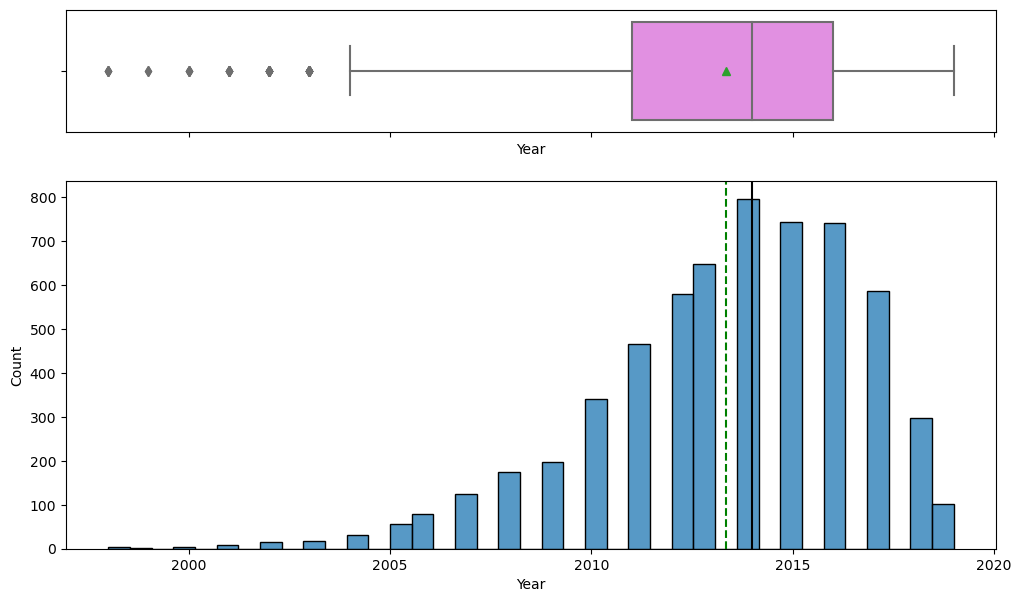

In [86]:
histogram_boxplot(df1,'Year')

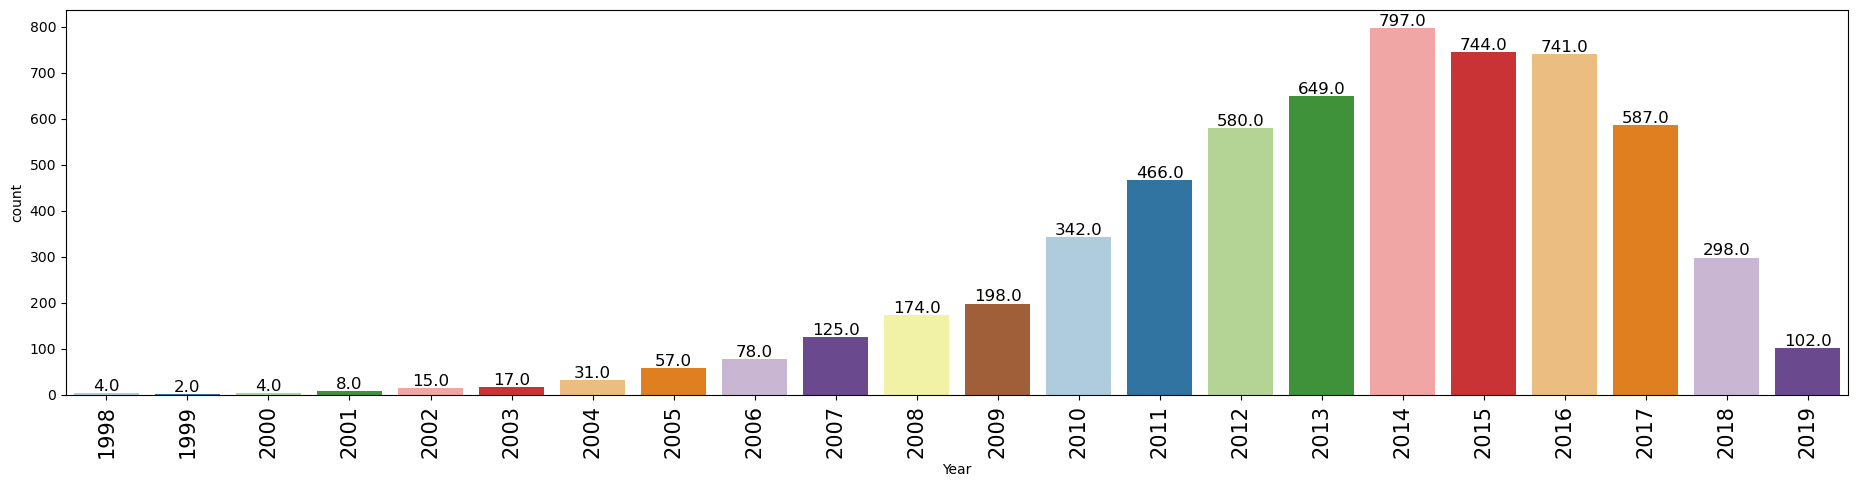

In [87]:
labeled_barplot(df1,'Year')

* The majority of cars were manufactured between 2010 and 2010
* 2014 and 2016 recoreded the highest number of cars manufactured

#### Location

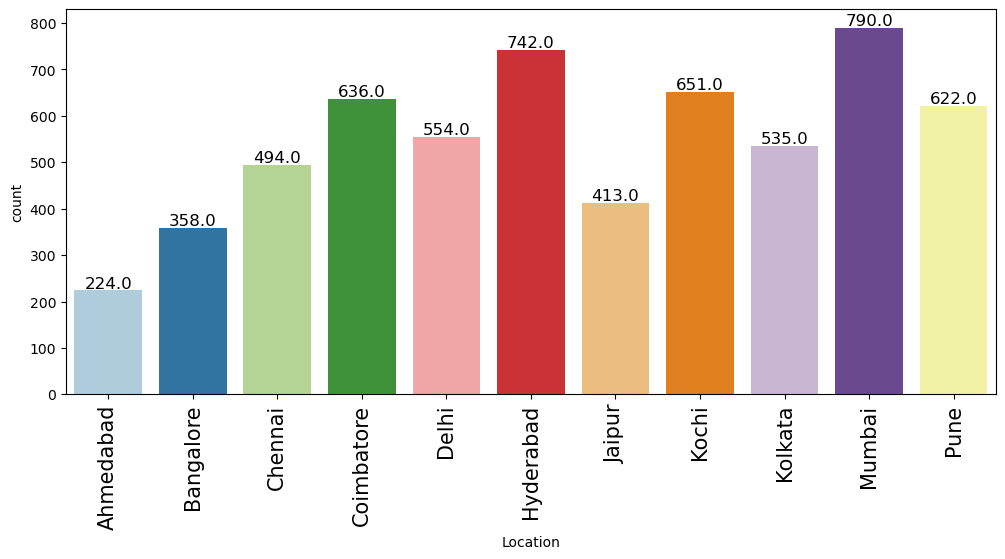

In [89]:
labeled_barplot(df1,'Location')

* Hyderabad and Mumbai had the highest number of available cars for sale

#### Kilometers_Driven

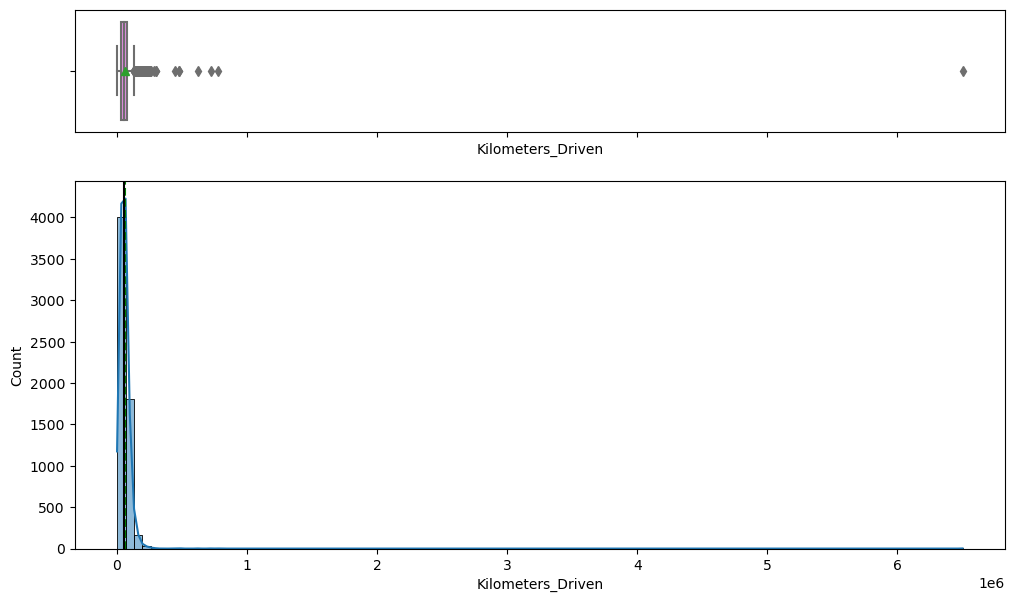

In [96]:
histogram_boxplot(df1,'Kilometers_Driven',bins = 100, kde = True)

* The distribution is heavily skewed to the right
* we will use the log transformed column and compare

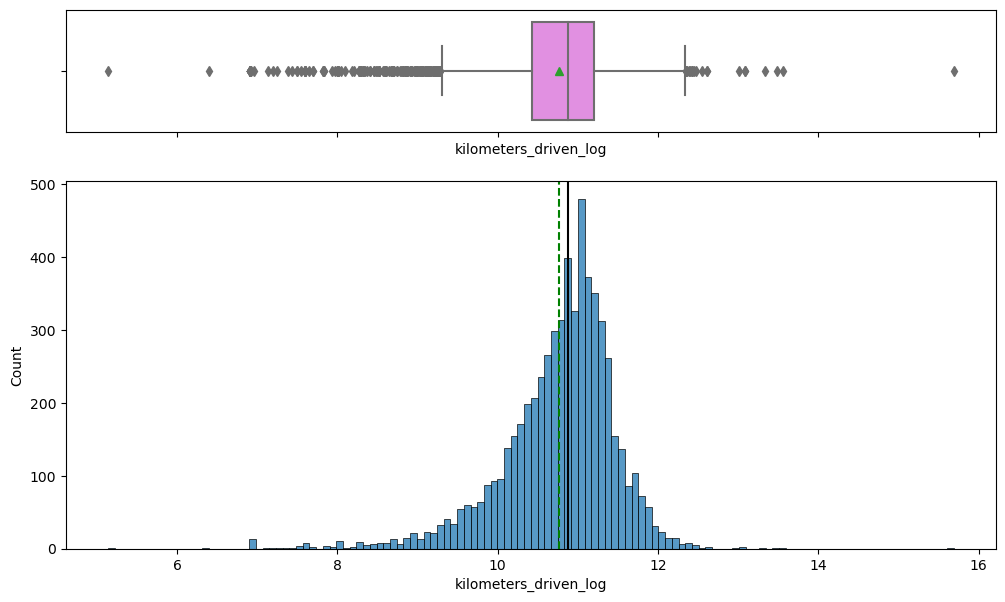

In [94]:
histogram_boxplot(df1,'kilometers_driven_log')

* thr transformation reduced the skewness

#### Fuel_type

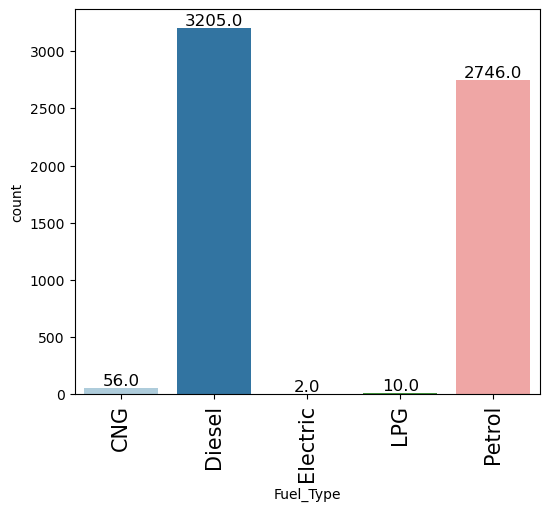

In [97]:
labeled_barplot(df1,'Fuel_Type')

* Most of the cars run on Diesel and Petrol with only a very little percentage running on LPG,CNG, and electric
* This means we would not be able to make very accurate predictions for cars that use electric and LPG as we just do not have enough data on them

#### Transmission

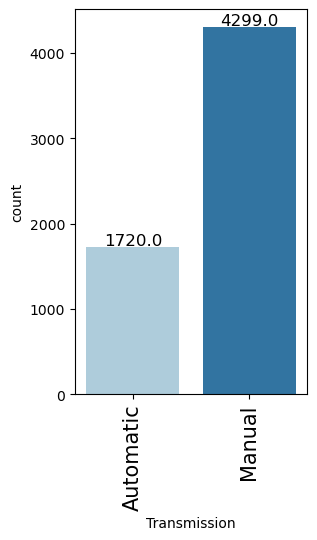

In [98]:
labeled_barplot(df1,'Transmission')

* Most cars use a manual transmission as compared to an automatic transmission

#### Owner_Type

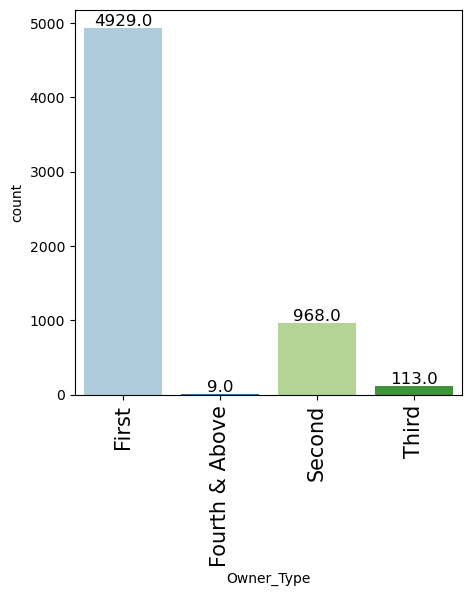

In [99]:
labeled_barplot(df1,'Owner_Type')

   * Most of the cars have just had one previous owner with just 9 cars having four and above 

In [100]:
df1.columns

Index(['Location', 'Year', 'Kilometers_Driven', 'Fuel_Type', 'Transmission',
       'Owner_Type', 'Seats', 'New_Price', 'Price', 'mileage_num',
       'Engine_num', 'Power_num', 'Brand', 'Model', 'price_log',
       'new_price_log', 'kilometers_driven_log'],
      dtype='object')

#### Seats

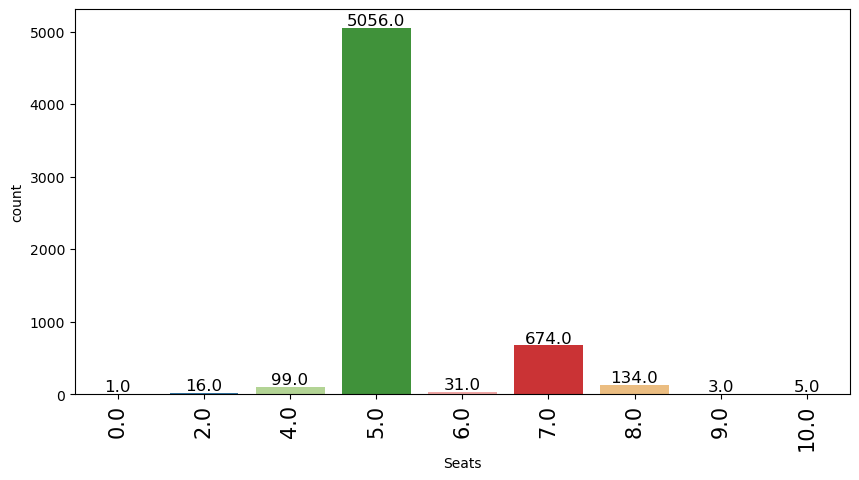

In [102]:
labeled_barplot(df1,'Seats')

* The majority of cars have 5 seats

#### New_price

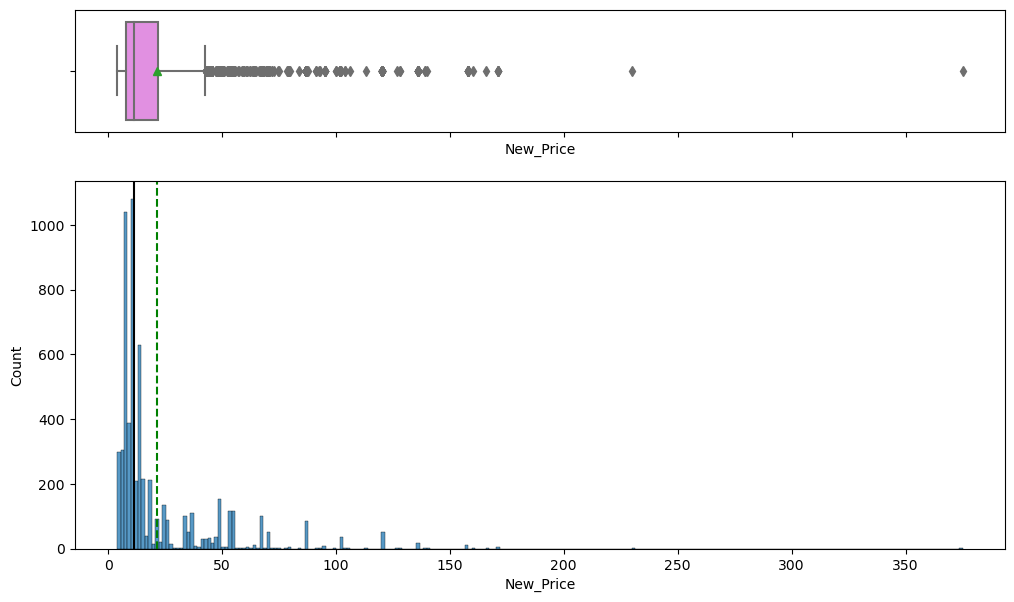

In [103]:
histogram_boxplot(df1,'New_Price')

* The distribution is highly skewed
* We are going to try with the transformed column

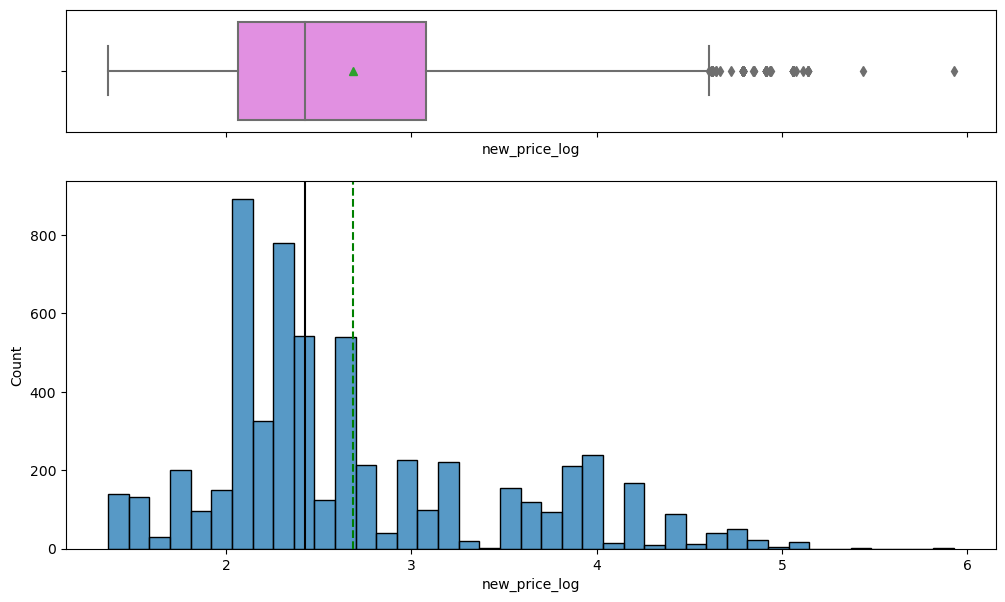

In [104]:
histogram_boxplot(df1,'new_price_log')

* the tranformed column provides a less skewed distribution

#### Price

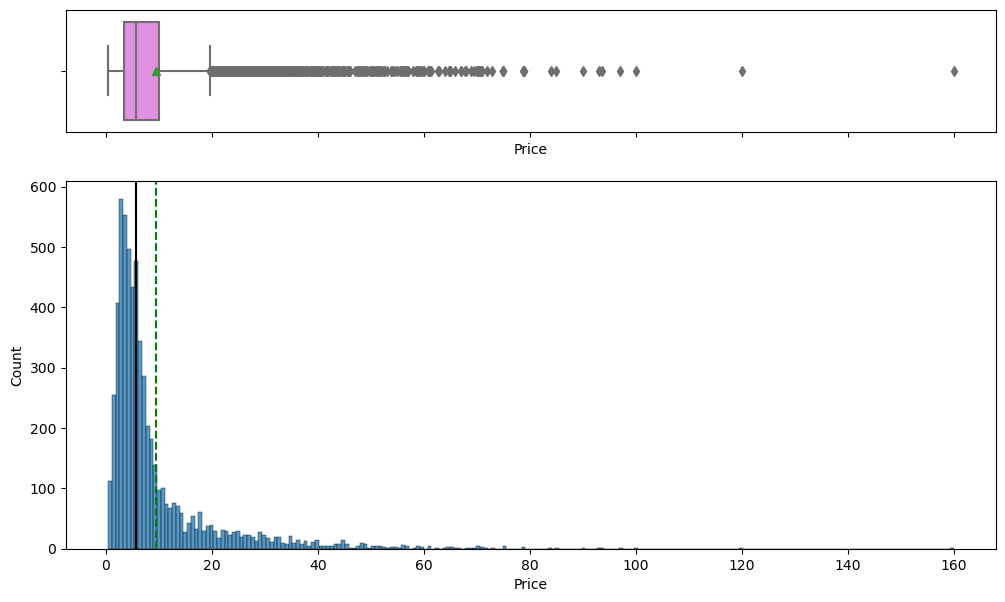

In [105]:
histogram_boxplot(df1,'Price')

* This is another skewed distribution
* We will try with the transformed column

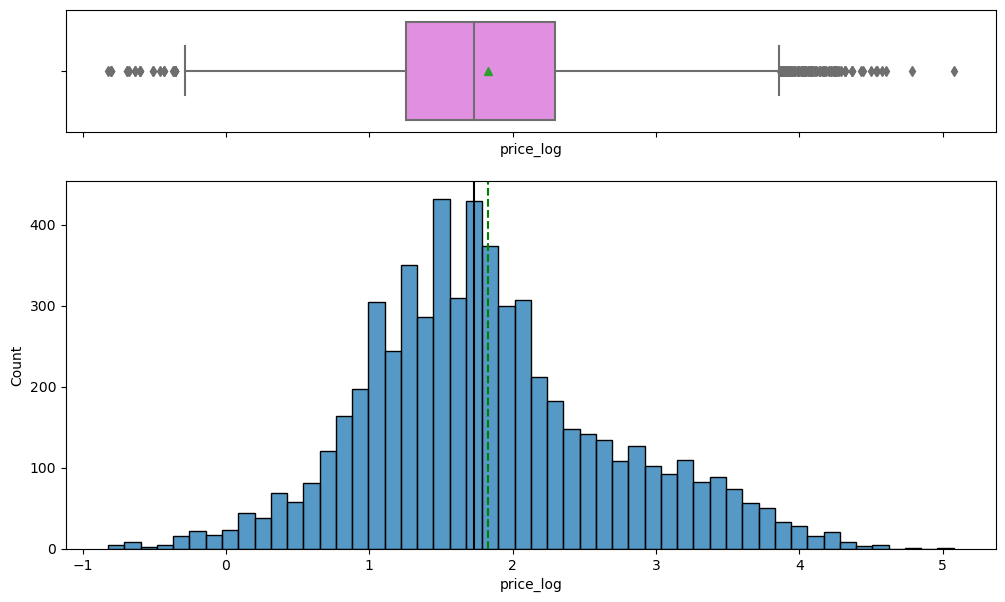

In [107]:
histogram_boxplot(df1,'price_log')

* The skewness has been reduced by the log transformation

#### Mileage_num

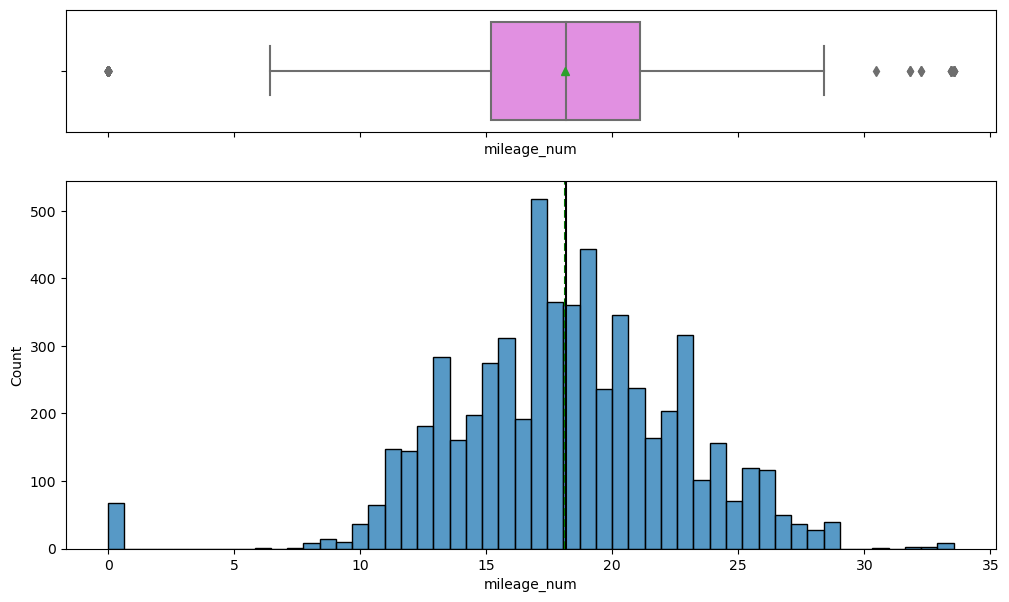

In [110]:
histogram_boxplot(df1,'mileage_num')

* The mileage column has a relatively normal distribution

#### Engine_num

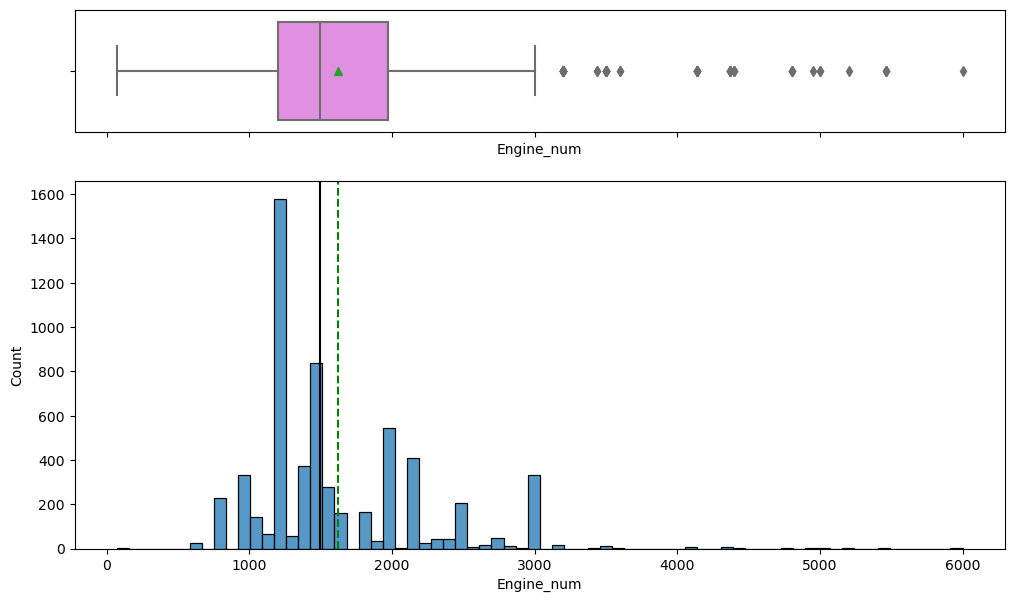

In [112]:
histogram_boxplot(df1,'Engine_num')

* There are a few cars that classify as outliers after 3000

#### Power_num

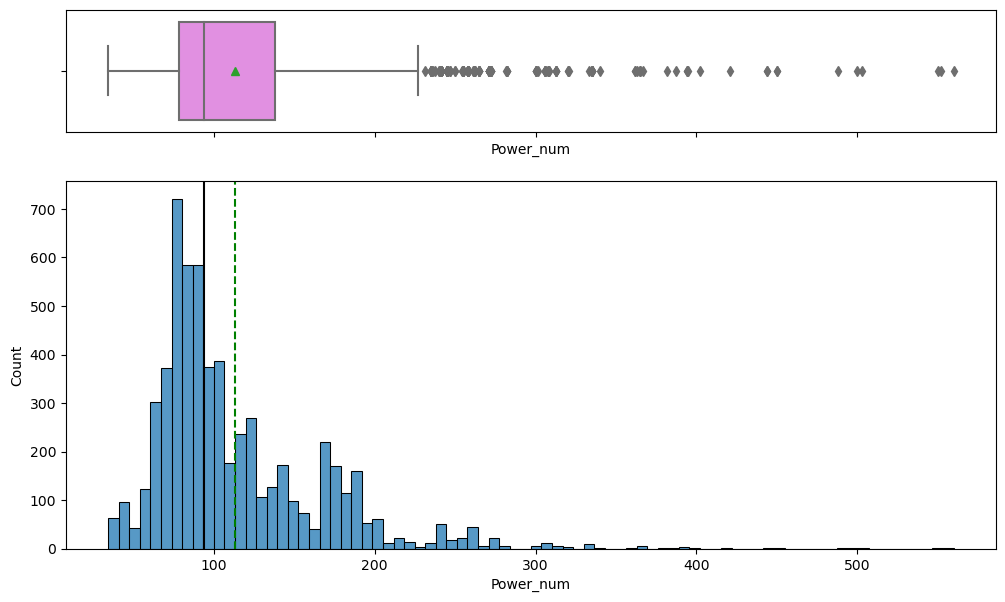

In [113]:
histogram_boxplot(df1,'Power_num')

* The distribution looks to be skewed however we can get some understanding from it by speculating tht there are some cars with high engine power

#### Brand

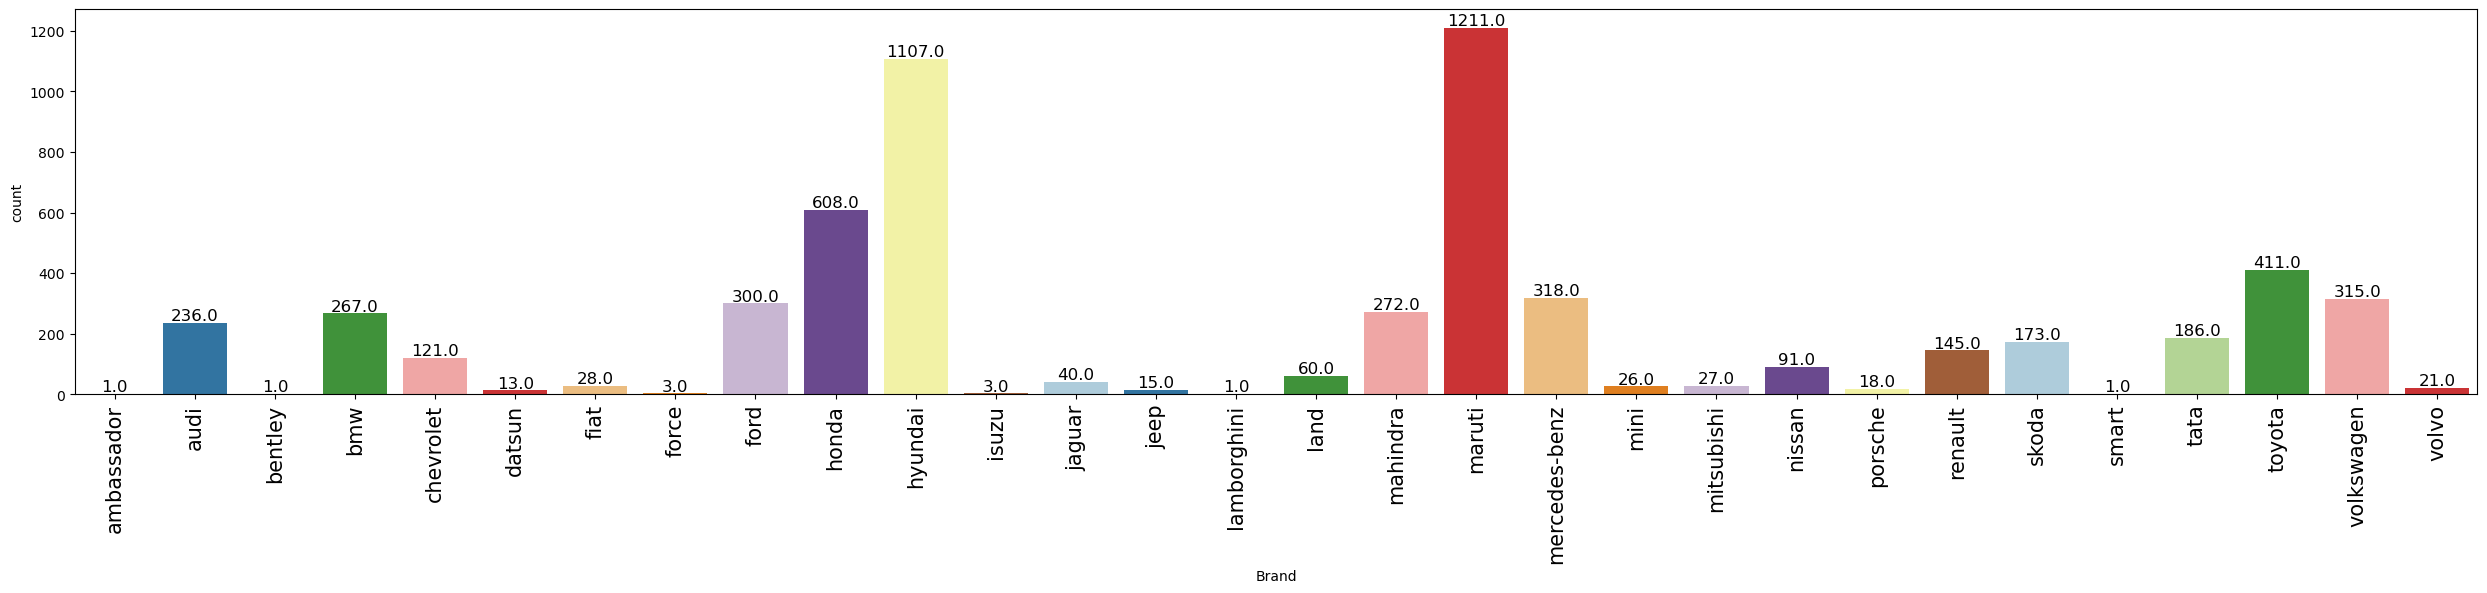

In [117]:
labeled_barplot(df1,'Brand')

* The brands with the highest number of cars are hyundai and maruti

#### Model

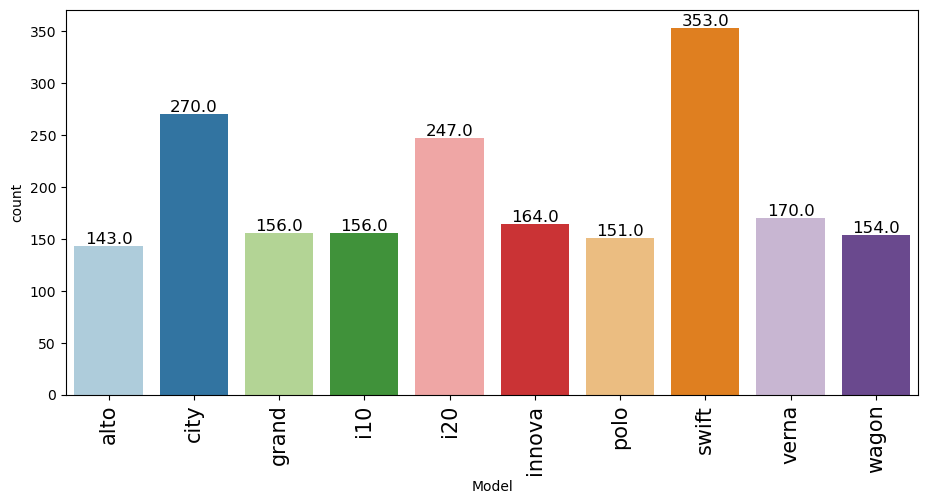

In [120]:
labeled_barplot(df1,'Model',n=10)

* Swift is the most in demand car

### Bivariate Analysis

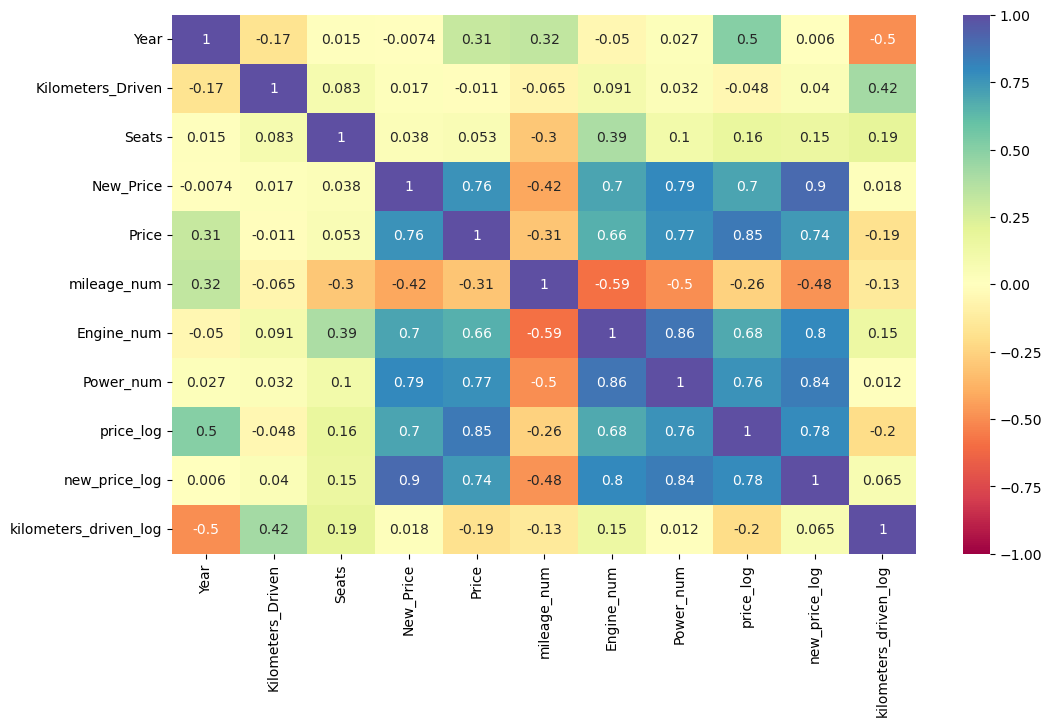

In [121]:
plt.figure(figsize=(12,7))
sns.heatmap(df1.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1)
plt.show()

* Engine and Power are highly correlated with the price of the car
* Contrary to thought, kilometers_driven does not affect the price of the cars greatly
* Mileage also does not seem to have a great relationship with price

In [122]:
df1.head()

,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Seats,New_Price,Price,mileage_num,Engine_num,Power_num,Brand,Model,price_log,new_price_log,kilometers_driven_log
0,Mumbai,2010,72000,CNG,Manual,First,5.0,5.51,1.75,26.60,998.0,58.16,maruti,wagon,0.559616,1.706565,11.184421
1,Pune,2015,41000,Diesel,Manual,First,5.0,16.06,12.50,19.67,1582.0,126.20,hyundai,creta,2.525729,2.776332,10.621327
2,Chennai,2011,46000,Petrol,Manual,First,5.0,8.61,4.50,18.20,1199.0,88.70,honda,jazz,1.504077,2.152924,10.736397
3,Chennai,2012,87000,Diesel,Manual,First,7.0,11.27,6.00,20.77,1248.0,88.76,maruti,ertiga,1.791759,2.422144,11.373663
4,Coimbatore,2013,40670,Diesel,Automatic,Second,5.0,53.14,17.74,15.20,1968.0,140.80,audi,a4,2.875822,3.972930,10.613246


#### Location vs Price

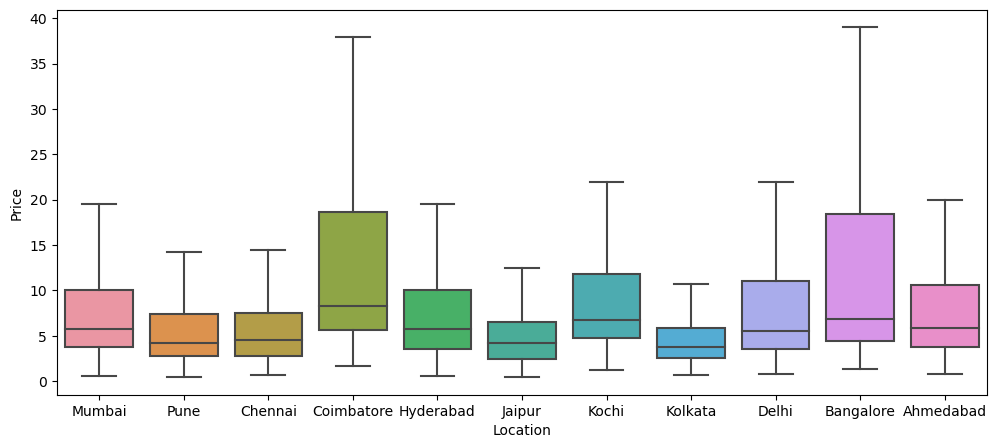

In [123]:
plt.figure(figsize=(12, 5))
sns.boxplot(x="Location", y="Price", data=df1,showfliers = False) # Turning off the outliers
plt.show()

* Coimbatore and Bangalore have the highest priced cars
* Mumbai with the highest number of sold cars has lower prices


#### Year vs Price

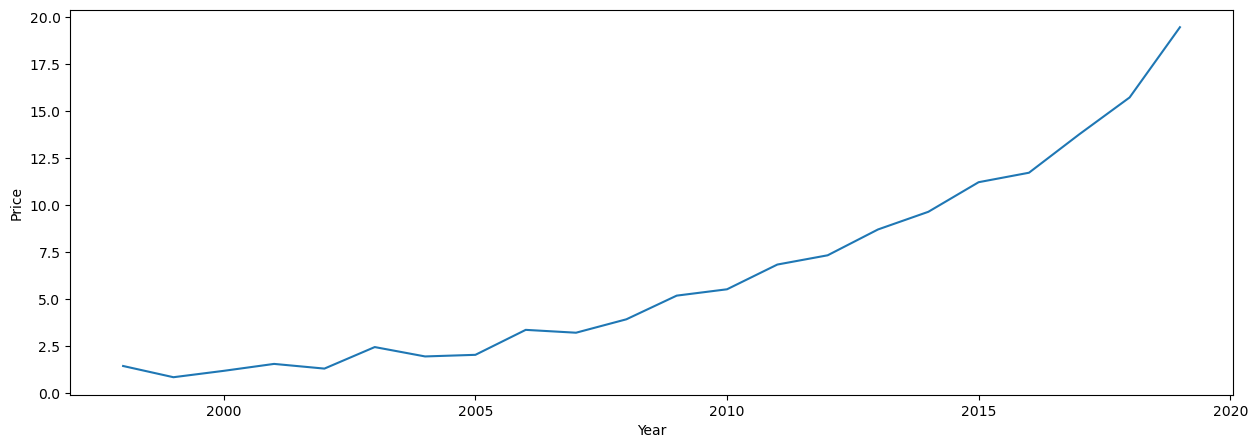

In [124]:
plt.figure(figsize=(15,5))
sns.lineplot(data=df1,x='Year',y='Price',ci=None)
plt.show()

* The prices of cars have increased over the years

#### Fuel Type vs Price

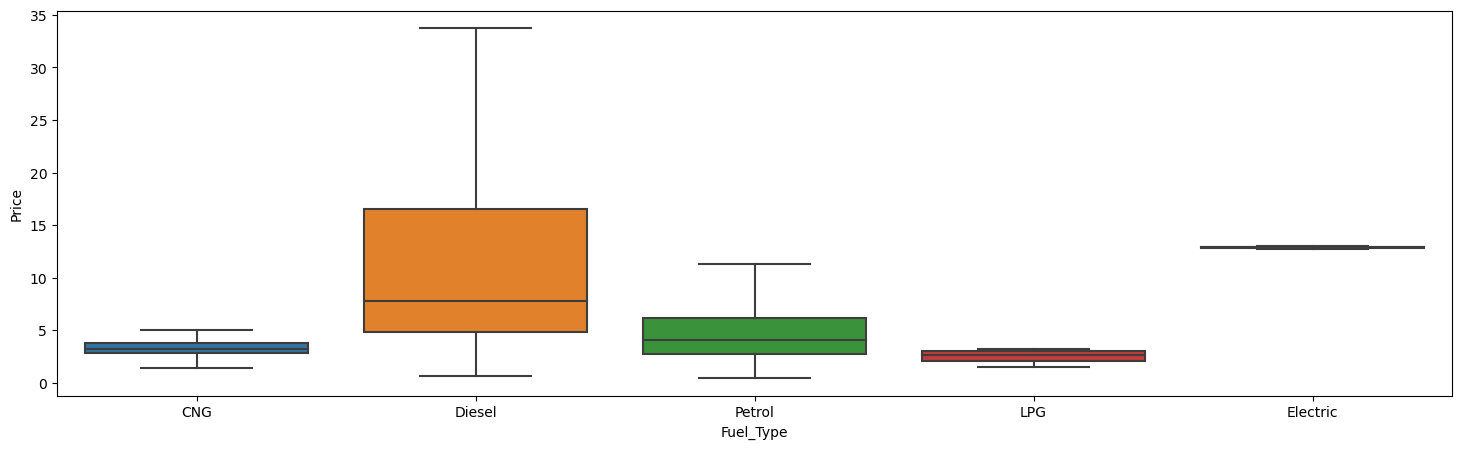

In [125]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Fuel_Type", y="Price", data=df1, showfliers = False)
plt.show()

* cars with diesel fuel cost more followed by electric cars

#### Transmission vs Price

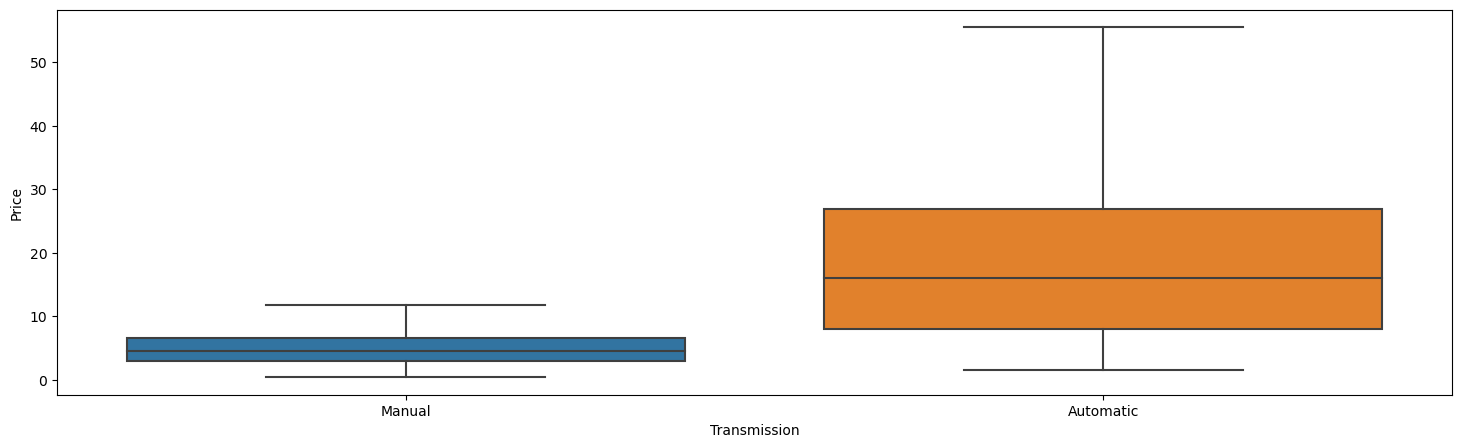

In [126]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Transmission", y="Price", data=df1, showfliers = False)
plt.show()

* Automatic cars have a higher median price than manual cars
* From our univriate analysis which saw manual cars being sold more than automatic cars, it could be deducted that it is because manual cars are cheaper than automatic cars

#### Seats vs Price

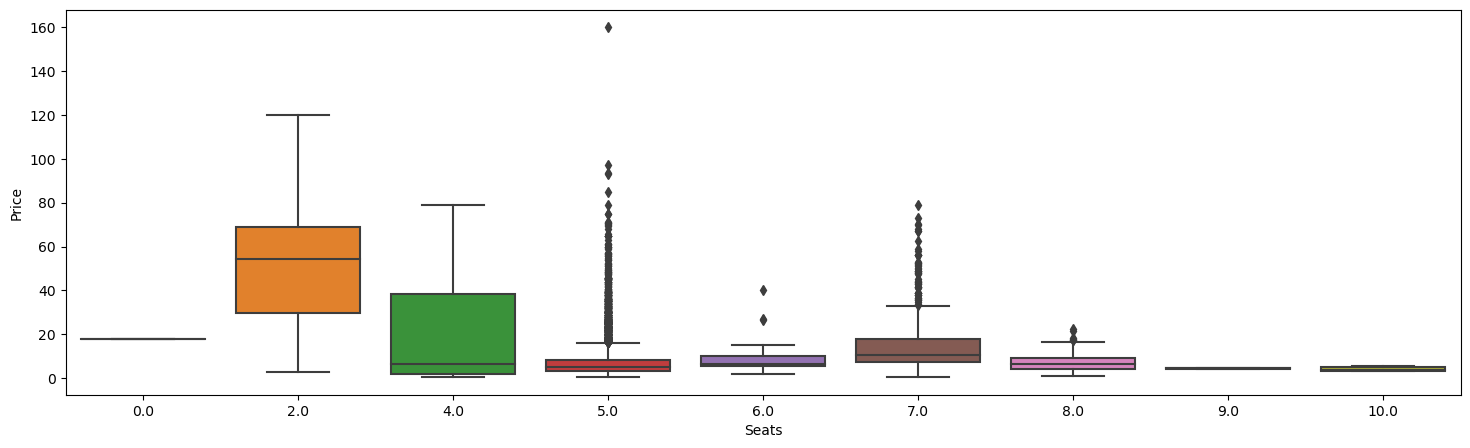

In [127]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Seats", y="Price", data=df1)
plt.show()

* Cars with fewer seats cost more than those with more seats
* Cars with fewer seats are usually luxury cars which cost more

#### Engine vs Price

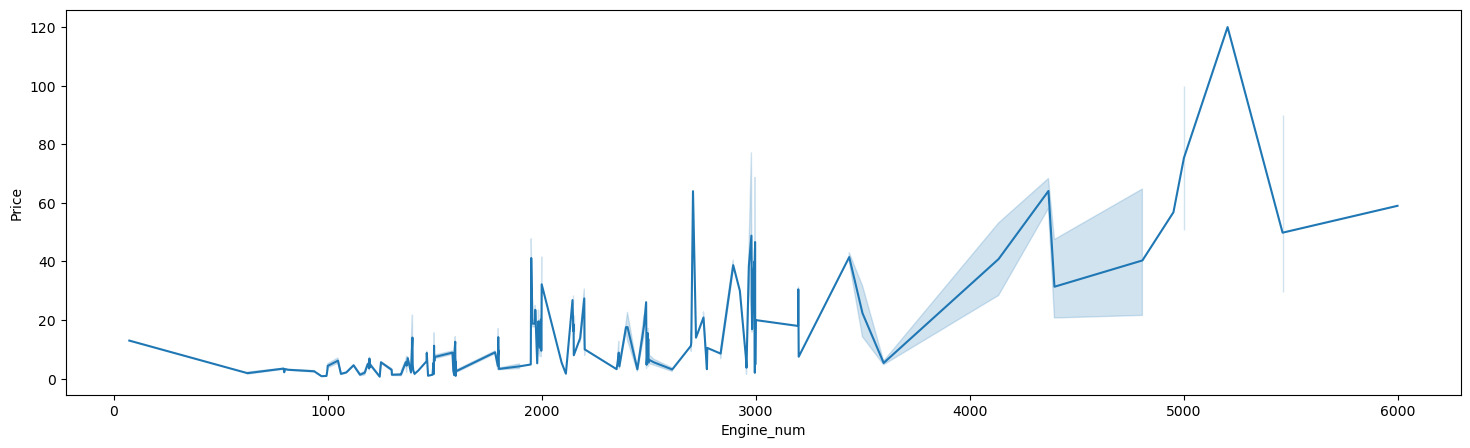

In [131]:
plt.figure(figsize=(18, 5))
sns.lineplot(x="Engine_num", y="Price", data=df1)
plt.show()

* The higher the engine volume, the higher the price

#### Price vs Brand

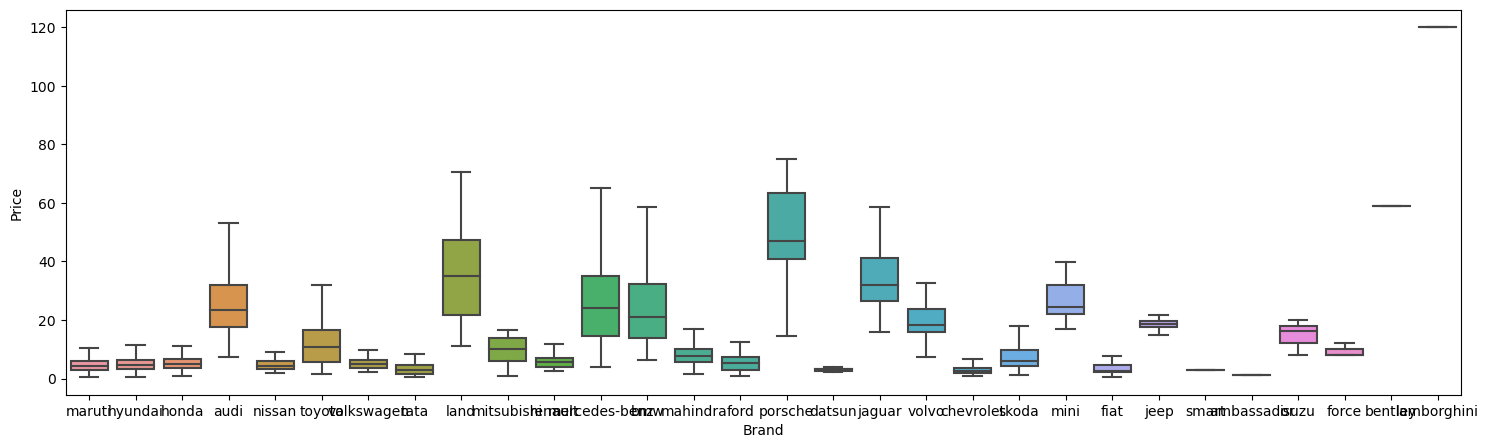

In [133]:
plt.figure(figsize=(18, 5))
sns.boxplot(x="Brand", y="Price", data=df1, showfliers = False)
plt.show()

* Lamborghini has the highest car price followed by the porshe while car brands like the maruti, hyundai and honda have lower prices

### Summary from EDA

* The EDA gave much insights on the variables and their relationships.
* From the Correlation map, it was noticed that there are some columns which correlate positively with the Price. They are Power and Engine.
* The price of a used car is the target variable and has a highly skewed distribution
* The displacement volume of the engine, the maximum power of the engine and the price of a new car of the same model is highly correlated with the price of a used car.
* Most of the cars in the data belong to Maruti or Hyundai. The price of used cars is lower for budget brands like Porsche, Bentley, Lamborghini, etc. The price of used cars is higher for premium brands like Maruti, Tata, Fiat, etc
* For the engine, there are a few upper outliers, indicating that there are a few car with a higher engine displacement volume. Higher priced cars have higher engine displacement. It is also highly correlated with the maximum engine power
* More than 80% of the cars are 5 seater cars
* The prices of cars have increased over the years and more than half of the cars were manufactured after 2014
* Hyderabad and Mumbai have the most demand for used cars. The price of used cars has a large IQR in Coimbatore and Bangalore.
* More than 70% of the cars have manual transmission. The price is higher for used cars with automatic transmission
* More than 80% of the used cars are being sold for the first time. The price of cars decreases as they keep getting resold.
### Observations from our bivariate analysis
* All 2 seater cars are luxury cars.cars with lower seats tend to have a higher price
* Mileage has a negative correlation with engine displacement and power. More powerful the engine, the more fuel it consumes in general
* Engine displacement and power of the car have a positive relationship with the price

## MODEL BUILDING

* Because the dependent variable,'Price' was heavily skewed, we are going to build two linear regression models. One with the original 'Price' variable and another with the normalized 'Price_log' variable

### Model 1 - Price

In [134]:
# defining the dependent and independent variables
X = df.drop(["Price", "price_log"], axis=1)
y = df["Price"]

In [135]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,Year,Kilometers_Driven,Seats,New_Price,mileage_num,Engine_num,Power_num,new_price_log,kilometers_driven_log,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Fuel_Type_Diesel,Fuel_Type_Electric,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Brand_audi,Brand_bentley,Brand_bmw,Brand_chevrolet,Brand_datsun,Brand_fiat,Brand_force,Brand_ford,Brand_honda,Brand_hyundai,Brand_isuzu,Brand_jaguar,Brand_jeep,Brand_lamborghini,Brand_land,Brand_mahindra,Brand_maruti,Brand_mercedes-benz,Brand_mini,Brand_mitsubishi,Brand_nissan,Brand_porsche,Brand_renault,Brand_skoda,Brand_smart,Brand_tata,Brand_toyota,Brand_volkswagen,Brand_volvo,Model_1000,Model_3,Model_5,Model_6,Model_7,Model_800,Model_a,Model_a-star,Model_a3,Model_a4,Model_a6,Model_a7,Model_a8,Model_accent,Model_accord,Model_alto,Model_amaze,Model_ameo,Model_aspire,Model_aveo,Model_avventura,Model_b,Model_baleno,Model_beat,Model_beetle,Model_bolero,Model_bolt,Model_boxster,Model_br-v,Model_brio,Model_brv,Model_c-class,Model_camry,Model_captiva,Model_captur,Model_cayenne,Model_cayman,Model_cedia,Model_celerio,Model_ciaz,Model_city,Model_civic,Model_cla,Model_classic,Model_cls-class,Model_clubman,Model_compass,Model_continental,Model_cooper,Model_corolla,Model_countryman,Model_cr-v,Model_creta,Model_crosspolo,Model_cruze,Model_d-max,Model_duster,Model_dzire,Model_e,Model_e-class,Model_ecosport,Model_eeco,Model_elantra,Model_elite,Model_endeavour,Model_enjoy,Model_eon,Model_ertiga,Model_esteem,Model_estilo,Model_etios,Model_evalia,Model_f,Model_fabia,Model_fiesta,Model_figo,Model_fluence,Model_fortuner,Model_fortwo,Model_freestyle,Model_fusion,Model_gallardo,Model_getz,Model_gl-class,Model_gla,Model_glc,Model_gle,Model_gls,Model_go,Model_grand,Model_grande,Model_hexa,Model_i10,Model_i20,Model_ignis,Model_ikon,Model_indica,Model_indigo,Model_innova,Model_jazz,Model_jeep,Model_jetta,Model_koleos,Model_kuv,Model_kwid,Model_lancer,Model_laura,Model_linea,Model_lodgy,Model_logan,Model_m-class,Model_manza,Model_micra,Model_mobilio,Model_montero,Model_mustang,Model_mux,Model_nano,Model_new,Model_nexon,Model_nuvosport,Model_octavia,Model_omni,Model_one,Model_optra,Model_outlander,Model_pajero,Model_panamera,Model_passat,Model_petra,Model_platinum,Model_polo,Model_prius,Model_pulse,Model_punto,Model_q3,Model_q5,Model_q7,Model_qualis,Model_quanto,Model_r-class,Model_rapid,Model_redi,Model_redi-go,Model_renault,Model_ritz,Model_rover,Model_rs5,Model_s,Model_s-class,Model_s-cross,Model_s60,Model_s80,Model_safari,Model_sail,Model_santa,Model_santro,Model_scala,Model_scorpio,Model_siena,Model_sl-class,Model_slc,Model_slk-class,Model_sonata,Model_spark,Model_ssangyong,Model_sumo,Model_sunny,Model_superb,Model_swift,Model_sx4,Model_tavera,Model_teana,Model_terrano,Model_thar,Model_tiago,Model_tigor,Model_tiguan,Model_tt,Model_tucson,Model_tuv,Model_v40,Model_vento,Model_venture,Model_verito,Model_verna,Model_versa,Model_vitara,Model_wagon,Model_wr-v,Model_wrv,Model_x-trail,Model_x1,Model_x3,Model_x5,Model_x6,Model_xc60,Model_xc90,Model_xcent,Model_xe,Model_xenon,Model_xf,Model_xj,Model_xuv300,Model_xuv500,Model_xylo,Model_yeti,Model_z4,Model_zen,Model_zest
0,2010,72000,5.0,5.51,26.60,998.0,58.16,1.706565,11.184421,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2015,41000,5.0,16.06,19.67,1582.0,126.20,2.776332,10.621327,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0

In [136]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [137]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 4213
Number of rows in test data = 1806


In [138]:
# fitting a linear model
lin_reg_model1 = LinearRegression()
lin_reg_model1.fit(x_train, y_train)

LinearRegression()

### Model Performance Check

* We will be using metric functions defined in sklearn for RMSE, MAE, and 𝑅2.
* We will define functions to calculate adjusted 𝑅 and MAPE.
* The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.

In [139]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [140]:
# Checking model performance on train set
print("Training Performance\n")
lin_reg_model_train_perf = model_performance_regression(lin_reg_model1, x_train, y_train)
lin_reg_model_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.998876,2.200606,0.87494,0.86651,42.748083


In [141]:
# Checking model performance on test set
print("Test Performance\n")
lin_reg_model_test_perf = model_performance_regression(lin_reg_model1, x_test, y_test)
lin_reg_model_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,4.746635,2.434426,0.810276,0.777484,42.942279


### Observations

* The RMSE and MAE scores of both the train data and the test data are close indicating no overfitting
* MAE of 2.4 indicates that our model is able to predict Price witha mean error of 2.4 Lakhs
* MAPE of 43% indicates the model can predict within 43% of the used car price range
* Both R2 and Adj R2 are high indicating that we were able to create a good model that is able to explain variance in the car price up to 81%

### Model 2 - Price_Log

In [142]:
# defining the dependent and independent variables
X = df.drop(["Price", "price_log"], axis=1)
y = df["price_log"]

# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

# splitting the data in 70:30 ratio for train to test data

x_train2, x_test2, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=1
)

print("Number of rows in train data =", x_train2.shape[0])
print("Number of rows in test data =", x_test2.shape[0])

Number of rows in train data = 4213
Number of rows in test data = 1806


In [143]:
# fitting a linear model
lin_reg_model2 = LinearRegression()
lin_reg_model2.fit(x_train2, y_train)

LinearRegression()

### Model Performance Check

* We will check the model performance on the actual prices and not the log values.
* We will create a function that will convert the log prices to actual prices and then check the performance.
* We will be using metric functions defined in sklearn for RMSE, MAE, and R2
.
* We will define a function to calculate MAPE and adjusted R2
.

In [144]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    # computing the actual prices by using the exponential function
    target = np.exp(target)
    pred = np.exp(pred)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [145]:
# Checking model performance on train set
print("Training Performance:")
lin_reg_model2_perf_train = model_performance_regression(lin_reg_model2, x_train2, y_train)
lin_reg_model2_perf_train

Training Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,2.738358,1.191905,0.941356,0.937403,12.958045


In [146]:
# Checking model performance on test set
print("Test Performance:")
lin_reg_model2_perf_test = model_performance_regression(lin_reg_model2, x_test2, y_test)
lin_reg_model2_perf_test

Test Performance:


,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,3.499753,1.358187,0.89686,0.879034,13.005316


* RSME and MAE scores are lower as compared to the forst model indicating ralatively better performance
* Both the R quared and ADJ R S quared are high( 94%) which means the model can explain up to 94% percent of the variance in the price of used cars

### Model Comparison

In [149]:
# training performance comparison

models_train_comp_df = pd.concat(
    [lin_reg_model_train_perf.T, lin_reg_model2_perf_train.T,], axis=1,
)

models_train_comp_df.columns = [
    "Linear Regression (Price)",
    "Linear Regression (price_log)",
]

print("Training performance comparison:")
models_train_comp_df

#lin_reg_model_train_perf

Training performance comparison:


,Linear Regression (Price),Linear Regression (price_log)
RMSE,3.998876,2.738358
MAE,2.200606,1.191905
R-squared,0.874940,0.941356
Adj. R-squared,0.866510,0.937403
MAPE,42.748083,12.958045


In [152]:
# test performance comparison

models_test_comp_df = pd.concat(
    [lin_reg_model_test_perf.T, lin_reg_model2_perf_test.T,], axis=1,
)

models_test_comp_df.columns = [
    "Linear Regression (Price)",
    "Linear Regression (price_log)",
]

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


,Linear Regression (Price),Linear Regression (price_log)
RMSE,4.746635,3.499753
MAE,2.434426,1.358187
R-squared,0.810276,0.896860
Adj. R-squared,0.777484,0.879034
MAPE,42.942279,13.005316


### WE WILL CONSIDER THE SECOND MODEL WITH THE TARGET - PRICE_LOG AS IT HAS A BETTER PERFORMANCE

## CONCLUSION

* Some markets tend to have higher prices. Cars4U should focus more on these markets, and set up offices in these areas if needed
* Also from our EDA, The business can focus more of its luxury car sales in areas like Bangalore. And also cars with lower prices can sell faster in areas like Mumbai as seen from our Analysis.
* Cars with higher engine capacity and power tend to have high prices. So when pricing a car these two factors should be noted.
* We improved our linear regression model performance by applying non-linear transformations to some of the attributes.
* Cars with a lesser number of kilometers driven should be preferred.
* From the analysis, factors like the year of manufacture, numbers of seats, maximum power of the engine, etc. tend to increase the price of the used car and Factors like distance volume of engine, log of the number of kilometers driven,etc. tend to decrease the price of the used car